<a href="https://colab.research.google.com/github/KMeghana27/Codesoft-Task1-/blob/main/iris_flower_classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/Iris data.csv")


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='petal_length'>

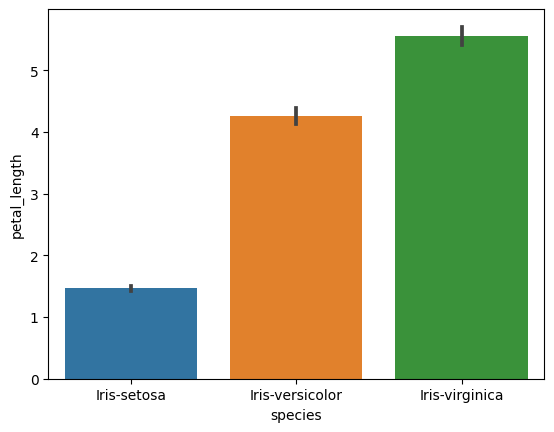

In [13]:
sns.barplot(x='species',y='petal_length',data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

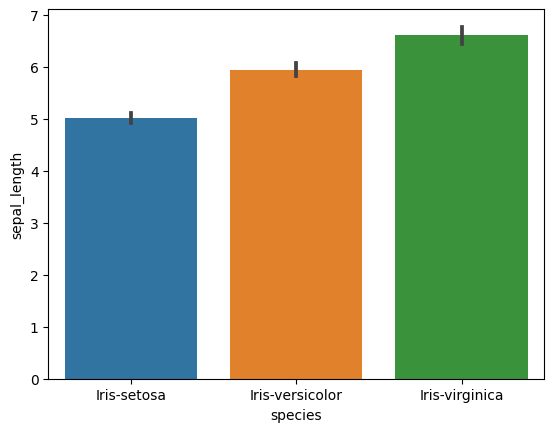

In [14]:
sns.barplot(x='species',y='sepal_length',data=df)

<Axes: xlabel='species', ylabel='petal_width'>

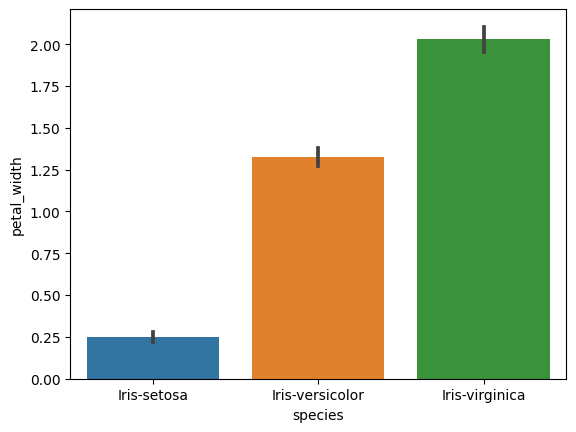

In [15]:
sns.barplot(x='species',y='petal_width',data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

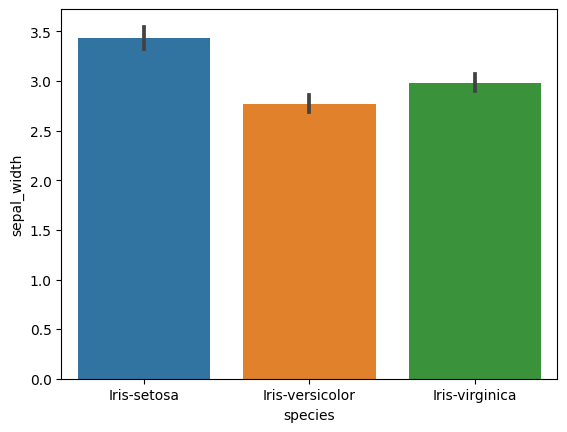

In [16]:
sns.barplot(x='species',y='sepal_width',data=df)

<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

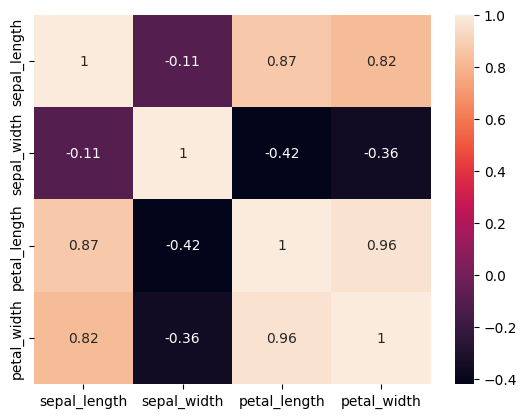

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
x=df.drop(['species'],axis=1)
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.9)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
svc = SVC()
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [23]:
algos={
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc
}

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [25]:
pre_acc = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc[name] = {
        'Precision': precision_score(y_test, y_pred,average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [26]:
pre_acc

{'SVC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'KNC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'LR': {'Precision': 0.9444444444444445,
  'Accuracy': 0.9333333333333333,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 0, 5]])},
 'DTC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'RFC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'ABC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'BC': {'Precision': 0.8666666666666667,
  'Acc

In [27]:
'''
Lets normalize the values and see if anything works
'''
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
pre_acc_2 = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc_2[name] = {
        'Precision': precision_score(y_test, y_pred,average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [29]:
pre_acc_2

{'SVC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'KNC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'LR': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'DTC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'RFC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'ABC': {'Precision': 0.8666666666666667,
  'Accuracy': 0.8666666666666667,
  'Confusion Matrix': array([[5, 0, 0],
         [0, 4, 1],
         [0, 1, 4]])},
 'BC': {'Precision': 0.8666666666666667,
  'Acc


# **We have obtained the maximum accuracy of 87% on all the algorithms used so we can use anyone of them**